<a href="https://colab.research.google.com/github/2303A52096/GenerativeAI_2025/blob/main/2303A52096_ass_07_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.5643 - loss: 0.6929 - val_accuracy: 0.5974 - val_loss: 0.6968
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6236 - loss: 0.6875 - val_accuracy: 0.6299 - val_loss: 0.6939
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6257 - loss: 0.6858 - val_accuracy: 0.6494 - val_loss: 0.6912
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6609 - loss: 0.6820 - val_accuracy: 0.6429 - val_loss: 0.6887
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6487 - loss: 0.6828 - val_accuracy: 0.6429 - val_loss: 0.6864
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6885 - loss: 0.6721 - val_accuracy: 0.6429 - val_loss: 0.6842
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6357 - loss: 0.6788 - val_accuracy: 0.6429 - val_loss: 0.6821
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6491 - loss: 0.6770 - val_accuracy: 0.6

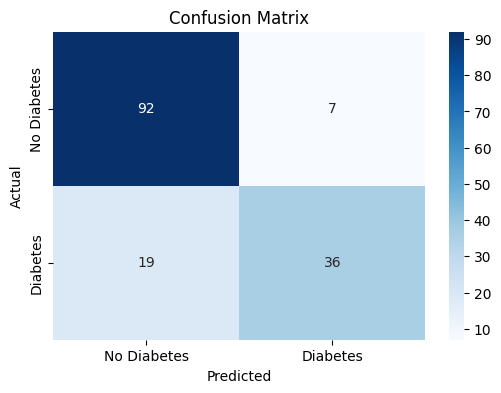

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Prediction for example features: No Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url, header=None)
df.columns = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
              'bmi', 'diabetespedigree', 'age', 'outcome']

X = df.drop(columns=['outcome'])
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(12, activation='swish'),
    Dense(25, activation='swish'),
    Dense(15, activation='swish'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))

train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_acc}, Testing Accuracy: {test_acc}')

model.save('diabetes_model.keras')

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_diabetes(features):
    loaded_model = keras.models.load_model('diabetes_model.keras')
    features = scaler.transform([features])
    return (loaded_model.predict(features)[0][0] > 0.5).astype(int)

example_features = X_test[0]
prediction = predict_diabetes(example_features)
print(f'Prediction for example features: {"Diabetes" if prediction else "No Diabetes"}')